## Introduction

The goal of this project is to predict the price of laptops based on various specifications such as brand, screen size, RAM, CPU type, and more. The dataset contains information about 1303 laptops with features like `Company`, `Product`, `Inches`, `Cpu`, `Ram`, `Weight`, and `Price_euros` as the target variable. We will use machine learning techniques to predict the laptop prices in **Euros**, which will then be converted to **Sri Lankan Rupees (LKR)**.


Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Load dataset

In [3]:
data = pd.read_csv("laptop_price.csv", encoding='ISO-8859-1')

Display dataset info

In [4]:
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB
None


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
data.shape

(1303, 12)

Check for missing values and
Drop rows with missing values for simplicity

In [6]:
print(data.isnull().sum())

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64


In [7]:
data = data.dropna()


In [8]:
data.head(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [9]:
data['Price_LKR'] = data['Price_euros'] * 305  # Convert Euros to LKR


In [10]:
data.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Price_LKR
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,408605.45
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,274176.70


In [11]:
data = data.drop(columns=['laptop_ID','Price_euros'])

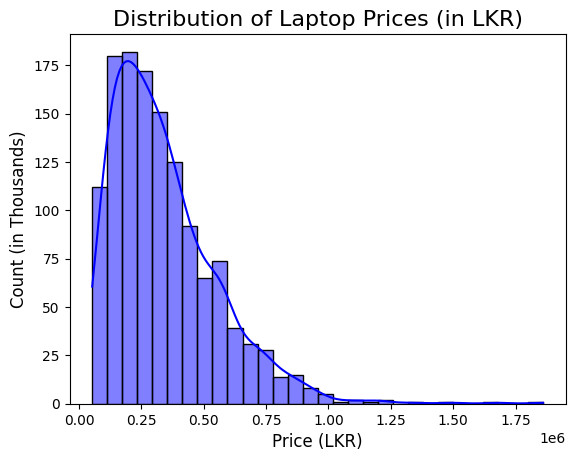

C:\Users\User\AppData\Local\Temp\ipykernel_11804\315227751.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Company', order=data['Company'].value_counts().index, palette='viridis')


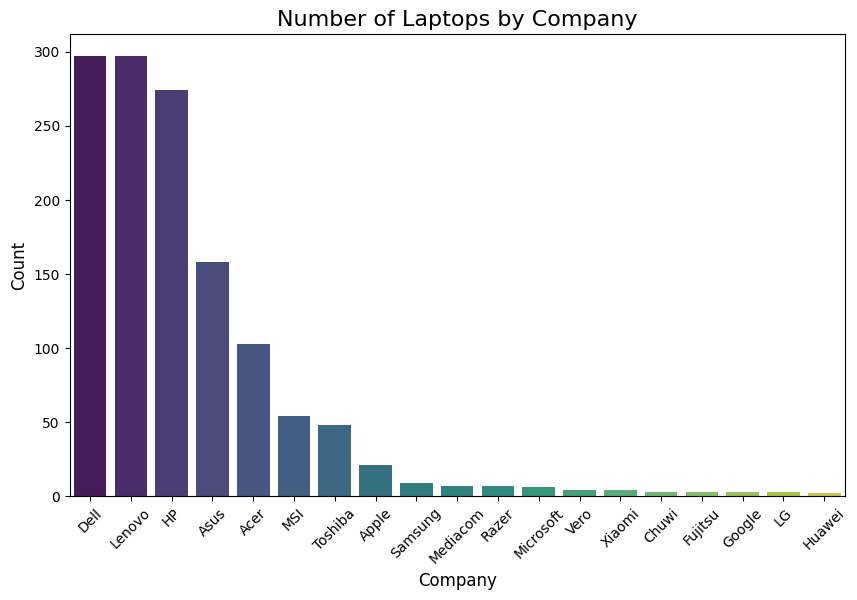

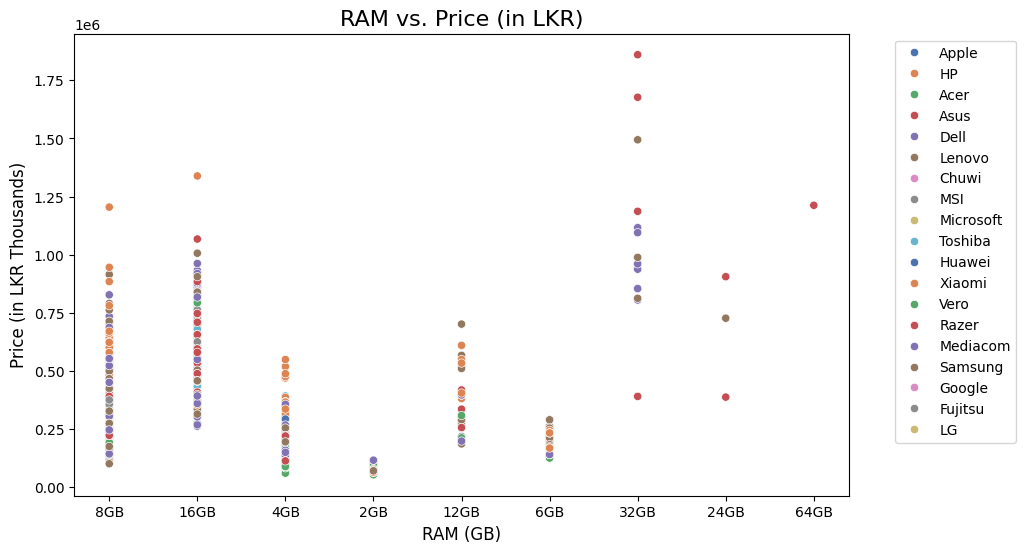

In [12]:
# Distribution of Laptop Prices in LKR
sns.histplot(data['Price_LKR'], kde=True, bins=30, color='blue')
plt.title('Distribution of Laptop Prices (in LKR)', fontsize=16)
plt.xlabel('Price (LKR)', fontsize=12)
plt.ylabel('Count (in Thousands)', fontsize=12)
plt.show()

# Laptop Count by Company
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Company', order=data['Company'].value_counts().index, palette='viridis')
plt.title('Number of Laptops by Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Relationship between RAM and Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Ram', y='Price_LKR', hue='Company', palette='deep')
plt.title('RAM vs. Price (in LKR)', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (in LKR Thousands)', fontsize=12)  # Explicitly adding unit
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [13]:
data['Ram'] = data['Ram'].astype(str).str.replace('GB','').astype('int32')
data['Weight'] = data['Weight'].astype(str).str.replace('kg','').astype('float32')

In [14]:
data.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_LKR
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,408605.45
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,274176.70


In [15]:
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
print(numeric_data.corr()['Price_LKR'])

Inches       0.068197
Ram          0.743007
Weight       0.210370
Price_LKR    1.000000
Name: Price_LKR, dtype: float64


In [16]:
len(data['Company'].value_counts())

19

In [17]:
data['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [18]:
def add_company(inpt):
    if inpt == 'Samsung' or inpt == 'Razer' or inpt == 'Mediacom' or inpt == 'Microsoft'or inpt == 'Xiaomi'or inpt == 'Vero'or inpt == 'Chuwi'or inpt == 'Google'or inpt == 'Fujitsu'or inpt == 'LG'or inpt == 'Huawei':
        return 'Other'
    else:
        return inpt

In [19]:
data['Company'] = data['Company'].apply(add_company)

In [20]:
data['Company'].value_counts()

Company
Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: count, dtype: int64

Product Column

In [21]:
len(data['Product'].value_counts())

618

In [22]:
data['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [23]:
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [24]:
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [25]:
# Assuming you want to drop 'ScreenResolution' only if it exists
if 'ScreenResolution' in data.columns:
    data = data.drop(columns=['ScreenResolution'])
else:
    print("Column 'ScreenResolution' already dropped.")

In [26]:
len(data['Cpu'].value_counts())

118

In [27]:
data['cpu_name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [28]:
data['cpu_name'].value_counts()

cpu_name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
AMD A9-Series 9410            3
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
AMD A6-Series A6-9220         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
Intel Xeon E3-1505M           2
Intel Xeon E3-1535M           2
Intel Atom X5-Z8350           2
Intel Atom x5-Z8300           1
AMD E-Series 6110             1
AMD E-Series 9000e            1
AMD E-Series E2-6110          1
AMD FX 9830P                  1

In [29]:
def set_processor(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Other'

In [30]:
data['cpu_name'] = data['cpu_name'].apply(set_processor)

In [31]:
data = data.drop(columns=['Cpu'])

In [32]:
data['cpu_name'].value_counts()

cpu_name
Intel Core i7    527
Intel Core i5    423
Other            155
Intel Core i3    136
AMD               62
Name: count, dtype: int64

In [33]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [34]:
data['gpu_name'] = data['Gpu'].apply(lambda x:" ".join(x.split()[0:1]))

In [35]:
data = data.drop(columns=['Gpu'])

In [36]:
data = data[data['gpu_name'] != 'ARM']

In [37]:
data['Ram'].value_counts()

Ram
8     619
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: count, dtype: int64

In [38]:
data.head(2)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_LKR,Touchscreen,Ips,cpu_name,gpu_name
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,408605.45,0,1,Intel Core i5,Intel
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,274176.70,0,0,Intel Core i5,Intel


In [39]:
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [40]:
def set_os(inpt):
    if inpt == 'Windows 10' or inpt == 'Windows 7' or inpt == 'Windows 10 S':
        return 'Windows'
    elif inpt == 'macOS' or inpt == 'Mac OS X':
        return 'Mac'
    elif inpt == 'Linux':
        return inpt
    else:
        return 'Other'

In [41]:
data['OpSys'] = data['OpSys'].apply(set_os)

In [42]:
data['OpSys'].value_counts()

OpSys
Windows    1125
Other        94
Linux        62
Mac          21
Name: count, dtype: int64

Drop  other unnecessary columns

In [43]:
data = data.drop(columns=['Inches', 'Product'])

In [44]:
data.head(5)

,Company,TypeName,Ram,OpSys,Weight,Price_LKR,Touchscreen,Ips,cpu_name,gpu_name
0,Apple,Ultrabook,8,Mac,1.37,408605.45,0,1,Intel Core i5,Intel
1,Apple,Ultrabook,8,Mac,1.34,274176.70,0,0,Intel Core i5,Intel
2,HP,Notebook,8,Other,1.86,175375.00,0,0,Intel Core i5,Intel
3,Apple,Ultrabook,16,Mac,1.83,773922.25,0,1,Intel Core i7,AMD
4,Apple,Ultrabook,8,Mac,1.37,550098.00,0,1,Intel Core i5,Intel


One-Hot Encoding

In [45]:
data = pd.get_dummies(data)

In [46]:
data.head(3)

,Ram,Weight,Price_LKR,Touchscreen,Ips,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Other,OpSys_Windows,cpu_name_AMD,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other,gpu_name_AMD,gpu_name_Intel,gpu_name_Nvidia
0,8,1.37,408605.45,0,1,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,8,1.34,274176.70,0,0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,8,1.86,175375.00,0,0,False,False,False,False,True,...,True,False,False,False,True,False,False,False,True,False


In [47]:
data.shape

(1302, 32)

Model Building and Selection

In [48]:
X = data.drop('Price_LKR', axis=1)
y = data['Price_LKR']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [50]:
X_train.shape, X_test.shape

((976, 31), (326, 31))

Training Model

In [51]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' -->>>>>>> ' +str(acc))

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model_acc(lr)

from sklearn.linear_model import Lasso
lasso = Lasso()
model_acc(lasso)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
model_acc(dt)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
model_acc(rf)

LinearRegression() -->>>>>>> 0.6995436594859734
Lasso() -->>>>>>> 0.6995444805823351
DecisionTreeRegressor() -->>>>>>> 0.6610308493156636


C:\Users\User\Desktop\Laptops_price_predictor\model\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.014e+11, tolerance: 4.243e+09
  model = cd_fast.enet_coordinate_descent(


RandomForestRegressor() -->>>>>>> 0.7883955260206713


Hyperparameter tunning

In [53]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[10, 50, 100],
            'criterion':['squared_error','absolute_error','poisson']}

grid_obj = GridSearchCV(estimator=rf, param_grid=parameters)

grid_fit = grid_obj.fit(X_train, y_train)

best_model = grid_fit.best_estimator_
best_model

RandomForestRegressor(criterion='poisson')

In [54]:
best_model.score(X_test, y_test)

0.7817824363931689

Save model

In [55]:
import pickle
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [56]:
X_test.columns

Index(['Ram', 'Weight', 'Touchscreen', 'Ips', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Other', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Linux', 'OpSys_Mac', 'OpSys_Other', 'OpSys_Windows',
       'cpu_name_AMD', 'cpu_name_Intel Core i3', 'cpu_name_Intel Core i5',
       'cpu_name_Intel Core i7', 'cpu_name_Other', 'gpu_name_AMD',
       'gpu_name_Intel', 'gpu_name_Nvidia'],
      dtype='object')

In [57]:
pred_value = best_model.predict([[8, 1.3, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]])
pred_value

C:\Users\User\Desktop\Laptops_price_predictor\model\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([482799.66721429])